## Corpus Analysis

In this notebook we will analyse the cleaned texts of the utopia and dystopia corpora.

In [27]:
import uv
from importlib import reload
reload(uv)

/Users/cdeljunco/.pyenv/versions/3.9.7/envs/nlp/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<module 'uv' from '/Users/cdeljunco/2-Work/Research/AI-Scifi/Code/UtopianVectors/uv.py'>

## Embedding Analysis

In [28]:
from gensim.models import Word2Vec
from gensim import models

In [29]:
all_texts = uv.get_all_texts(uv.get_lemmatized_eutopia_text_dicts())

note: does not include scanned pdfs


In [30]:
print(len(all_texts))
n_words = len([word for text in all_texts for word in text])
print(n_words)
print(n_words/len(all_texts))

721
21626264
29994.818307905687


In [35]:
# w2vmodel_utopia = Word2Vec(
#         all_texts,
#         size=100,
#         window=10,
#         min_count = 10,
#         sorted_vocab = 1)

In [37]:
# w2vmodel_utopia.save('../utopialemm_size100_window10_mincount10_sorted.model')

In [38]:
w2vmodel_utopia = Word2Vec.load("../utopialemm_size100_window10_mincount10_sorted.model")

In [39]:
vocab_length = len(w2vmodel_utopia.wv.vocab)
print(vocab_length)

59322


In [7]:
# w2vmodel_gnews = models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary= True)

In [42]:
# for word in uv.lemmatize_search_words():
#     print(word)
#     print(w2vmodel_gnews.wv.most_similar(word))

In [40]:
w2vmodel_gnews_slim = models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300-SLIM.bin', binary= True)

In [68]:
uv.lemmatize_search_words()

['justice',
 'man',
 'woman',
 'artificial_intelligence',
 'factory',
 'labor',
 'state',
 'economy',
 'food',
 'freedom',
 'health',
 'time',
 'home',
 'house',
 'government',
 'immigrant',
 'safety',
 'police',
 'crime',
 'equality',
 'planet',
 'space',
 'earth',
 'technology',
 'machinery',
 'machine',
 'cyber',
 'computer',
 'digital',
 'industrial',
 'future',
 'automation',
 'robot',
 'science',
 'network',
 'interface',
 'virtual',
 'military',
 'engineer',
 'system']

/var/folders/zm/4xwl5pd57dnfqm16krd4ny1syhlqkc/T/ipykernel_26054/1009754796.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for theta, simword in zip(np.arange(-5*np.pi/4, 3*np.pi/4, 2*np.pi/10), w2vmodel_gnews_slim.wv.most_similar(word)):


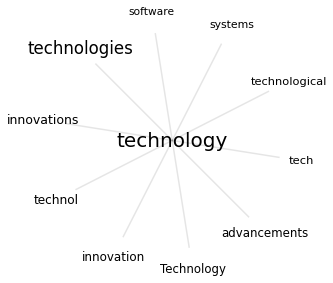

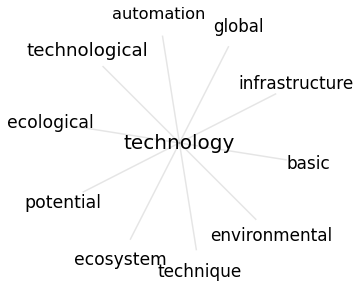

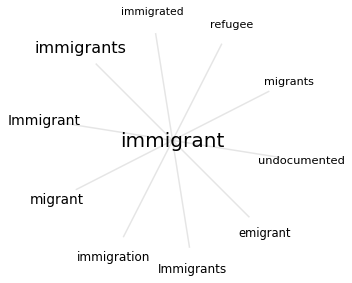

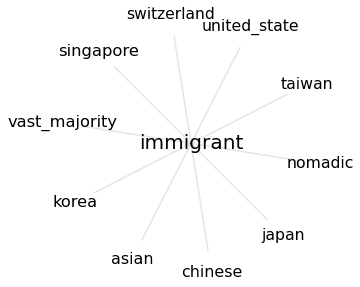

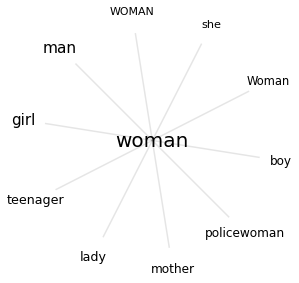

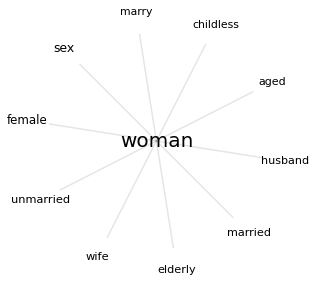

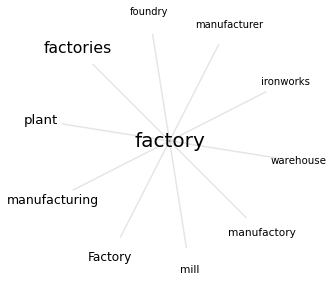

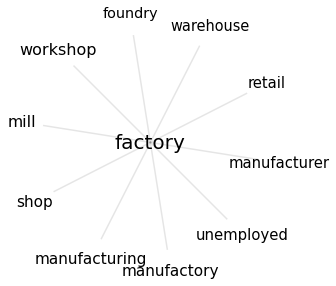

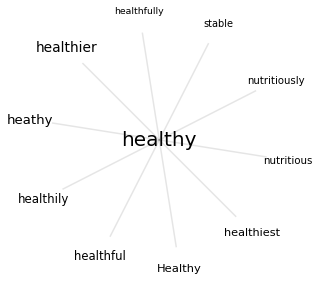

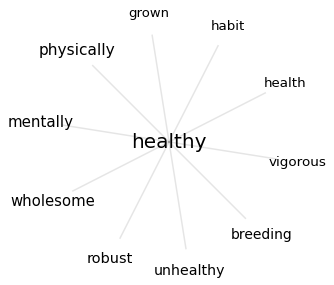

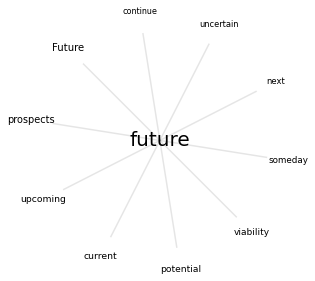

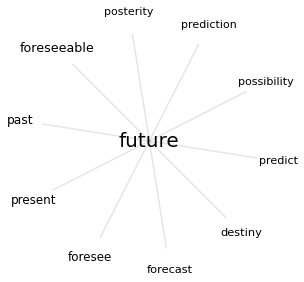

In [71]:
search_words_presentation = ['technology', 'immigrant', 'woman', 'factory', 'healthy', 'future']
for word in search_words_presentation: #uv.lemmatize_search_words():
#     print(word)
    try:
#         print("most similar in slim gnews:")
#         print(w2vmodel_gnews_slim.wv.most_similar(word))
        fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
        for theta, simword in zip(np.arange(-5*np.pi/4, 3*np.pi/4, 2*np.pi/10), w2vmodel_gnews_slim.wv.most_similar(word)):
            ax.plot([theta, theta], [0, 1], c='gray', alpha = 0.2)
            ax.text(theta, 1.2, simword[0], fontsize = 20*simword[1], ha = 'center', va = 'center')
            ax.set_rmax(1)
            ax.set_rticks([])
            ax.set_xticks([])
            plt.axis('off')
        ax.text(0, 0, word, fontsize = 20, ha = 'center', va = 'center')
    except:
        print("not in slim gnews vocabulary")
    try:
#         print("most similar in utopia:")
#         print(w2vmodel_utopia.wv.most_similar(word))#, restrict_vocab = int(1*len(w2vmodel_utopia.wv.vocab)/3)))
        fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
        for theta, simword in zip(np.arange(-5*np.pi/4, 3*np.pi/4, 2*np.pi/10), w2vmodel_utopia.wv.most_similar(word)):
            ax.plot([theta, theta], [0, 1], c='gray', alpha = 0.2)
            ax.text(theta, 1.2, simword[0], fontsize = 20*simword[1], ha = 'center', va = 'center')
            ax.set_rmax(1)
            ax.set_rticks([])
            ax.set_xticks([])
            plt.axis('off')
        ax.text(0, 0, word, fontsize = 20, ha = 'center', va = 'center')
    except:
        print("not in utopia vocabulary")

In [ ]:
#idea to refine later on: add all alternate/mis- spellings to "positive" option in most_similar 

## Visualisation Plans
Create embeddings for each book using doc2vec.

tSNE plot of books, color by 

- year, 
- author demography, 
- or even just utopia/dystopia


Visualise certain words in embedding space vs normal embedding space



In [24]:
import gensim

In [28]:
taggedDocs = []

In [29]:
i = 0

In [30]:
for text in all_cleaned_texts_utopia + all_cleaned_texts_dystopia:
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = text, tags = [i]))
    i +=1

In [26]:
doc2vec_model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [31]:
doc2vec_model.build_vocab(taggedDocs)

In [32]:
doc2vec_model.train(taggedDocs, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

In [33]:
utopia_vecs = {}

In [34]:
for text in cleaned_texts_pdf:
    utopia_vecs[text] = [doc2vec_model.infer_vector(cleaned_texts_pdf[text])]

In [35]:
for text in cleaned_texts_epub_txt:
    utopia_vecs[text] = [doc2vec_model.infer_vector(cleaned_texts_epub_txt[text])]

In [36]:
dystopia_vecs = {}

In [37]:
for text in cleaned_texts_dystopia:
    dystopia_vecs[text] = [doc2vec_model.infer_vector(cleaned_texts_dystopia[text])]

In [41]:
import numpy as np

In [42]:
utopia_labels = np.zeros(len(utopia_vecs))

In [46]:
len(utopia_vecs)

725

In [47]:
len(dystopia_vecs)

67

In [43]:
dystopia_labels = np.ones(len(dystopia_vecs))

In [44]:
from yellowbrick.text import TSNEVisualizer, UMAPVisualizer

In [45]:
umap = UMAPVisualizer()

In [ ]:
umap.fit(utopia_vecs, labels[0:1000])
umap.show()

## Linguistic Counts and Measures

In [ ]:
def text_summaries(cleaned_texts, num_topics=5):
    
    word_use = {}
    for text in cleaned_texts:
        for word in text:
            if word not in word_use:
                word_use[word] = 0
            if word in word_use:
                word_use[word] += 1
    
    total_words = sum(word_use.values())
    
    sorted_words = sorted(word_use.items(), key=operator.itemgetter(1))
    sorted_words.reverse()

    dictionary = Dictionary(cleaned_texts)
    corpus = [dictionary.doc2bow(text) for text in cleaned_texts]
    ldamodel = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, iterations=500)
    
    tf_idf_model = TfidfModel(corpus)
    tf_idf_texts = tf_idf_model[corpus]
    
    d = {dictionary.get(id): value for doc in tf_idf_texts for id, value in doc}
    sorted_d = sorted(d.items(), key=operator.itemgetter(1))
    sorted_d.reverse()
    
    print("Total number of documents: " + str(total_docs))
    print("Average length of text: " + str(avg_len))
    print(" ")
    print("The top 5 tf-idf scores:")
    print(sorted_d[0:5])
    print(" ")
    print("The top 20 most used words:")
    print(sorted_words[0:20])
    print(" ")
    print("Topic Model with 5 topics")
    print(ldamodel.print_topics())
    return cleaned_texts, ldamodel

TODO:

- compare bootstrapped model (utopia) vs google news model
- plots by decade, plots by demography (gender, race, location, sexuality)
- time periods vs usage of certain concepts, such as nature, climate
- formation of labour/labor before and after 1970s
- lemmatization
- microgenres by time period
- words and markers of genre
- elements across time

Research questions: Are utopian and dystopian fiction genres of infrastructure? How? Is this more the case for utopia than dystopia? Literature of boredom (infrastructure) versus romance?